In [2]:
import csv
import random
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 用于3D绘图

In [ ]:
def generate_random_sites_csv_and_plot(
    filename="sites_initial.csv",
    num_sites=500,
    x_min=0.0, x_max=10.0,
    y_min=0.0, y_max=10.0,
    z_min=0.0, z_max=10.0,
    site_type=0, # 默认站点类型为0
    overwrite=False, # 默认不覆盖现有文件
    plot_points=True # 新增参数：是否绘制点
):
    """
    生成包含随机站点坐标和类型的CSV文件，并可选地绘制3D散点图。

    Args:
        filename (str): 输出CSV文件的名称。
        num_sites (int): 要生成的站点数量。
        x_min, x_max (float): X坐标的最小值和最大值。
        y_min, y_max (float): Y坐标的最小值和最大值。
        z_min, z_max (float): Z坐标的最小值和最大值。
        site_type (int): 所有站点的默认类型 (目前支持单一类型)。
        overwrite (bool): 如果文件已存在是否覆盖，默认为False。
        plot_points (bool): 是否绘制生成的点。
    """

    if os.path.exists(filename) and not overwrite:
        print(f"错误: 文件 '{filename}' 已存在。请选择不同的文件名或设置 overwrite=True。")
        return False, None # 返回 False 和 None 表示失败

    sites_data = [] # 用于存储生成的站点数据，方便后续绘图

    try:
        with open(filename, 'w', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow(['id', 'x', 'y', 'z', 'type']) # 写入CSV头

            for i in range(num_sites):
                site_id = i
                x = random.uniform(x_min, x_max)
                y = random.uniform(y_min, y_max)
                z = random.uniform(z_min, z_max)
                
                csv_writer.writerow([site_id, x, y, z, site_type])
                sites_data.append({'id': site_id, 'x': x, 'y': y, 'z': z, 'type': site_type})

        print(f"成功生成文件 '{filename}'，包含 {num_sites} 个随机站点。")
        print(f"Box 范围: X=[{x_min}, {x_max}], Y=[{y_min}, {y_max}], Z=[{z_min}, {z_max}]")

        # 可视化部分
        if plot_points and sites_data:
            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')

            xs = [d['x'] for d in sites_data]
            ys = [d['y'] for d in sites_data]
            zs = [d['z'] for d in sites_data]

            ax.scatter(xs, ys, zs, c='b', marker='o', s=20) # 蓝色圆点，大小20

            ax.set_xlabel('X Coordinate')
            ax.set_ylabel('Y Coordinate')
            ax.set_zlabel('Z Coordinate')
            ax.set_title(f'{num_sites} Random Sites in Box')

            # 设置轴的限制，确保与输入的盒子范围一致
            ax.set_xlim(x_min, x_max)
            ax.set_ylim(y_min, y_max)
            ax.set_zlim(z_min, z_max)

            # 调整视角 (可选)
            ax.view_init(elev=20, azim=130) # elev是俯仰角，azim是方位角

            plt.show() # 显示图表
            
        return True, sites_data # 返回 True 表示成功，并返回生成的数据
    
    except IOError as e:
        print(f"写入文件时发生IO错误: {e}")
        return False, None
    except Exception as e:
        print(f"发生未知错误: {e}")
        return False, None

: 

: 

: 

: 

: 

: 

: 

成功生成文件 'sites.csv'，包含 100 个随机站点。
Box 范围: X=[0.0, 0.001], Y=[0.0, 0.001], Z=[0.0, 0.001]


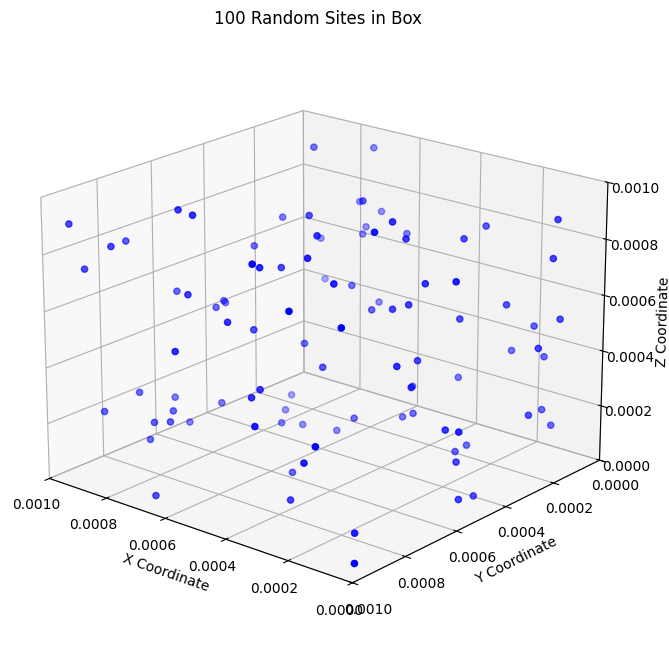


站点生成过程完成。数据保存在 'sites.csv'。


: 

: 

: 

: 

: 

: 

: 

In [ ]:
my_filename = "sites.csv"
my_num_sites = 500
my_x_min, my_x_max = 0.0, 1e-3
my_y_min, my_y_max = 0.0, 1e-3
my_z_min, my_z_max = 0.0, 1e-3
my_site_type = 0 # 默认类型

# 设置是否覆盖现有文件和是否绘制点
my_overwrite = True
my_plot = True

# 调用函数生成CSV和图表
success, generated_data = generate_random_sites_csv_and_plot(
    filename=my_filename,
    num_sites=my_num_sites,
    x_min=my_x_min, x_max=my_x_max,
    y_min=my_y_min, y_max=my_y_max,
    z_min=my_z_min, z_max=my_z_max,
    site_type=my_site_type,
    overwrite=my_overwrite,
    plot_points=my_plot
)

if success:
    print(f"\n站点生成过程完成。数据保存在 '{my_filename}'。")
else:
    print("\n站点生成失败。")